##  SHAILESH KUMAR

## Task 5

## Exploratory Data Analysis - Sports

###   (Level - Advanced)

● Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’

● As a sports analysts, find out the most successful teams, players and factors
contributing win or loss of a team.

● Suggest teams or players a company should endorse for its products.

● You can choose any of the tool of your choice
(Python/R/Tableau/PowerBI/Excel/SAP/SAS)

● Dataset: https://bit.ly/34SRn3b

## Task

To Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’

### Importing the required libraries!

In [1]:
import pandas as pd
import numpy as np

### Loading the dataset

In [2]:
deliveries = pd.read_csv(r"D:\Professionalism Files\GRIP\5\deliveries.csv")
matches = pd.read_csv(r"D:\Professionalism Files\GRIP\5\matches.csv")
print("The data has been loaded")

The data has been loaded


In [3]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [5]:
matches.team1.unique().size

15

In [6]:
matches.winner.value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [7]:
pom = matches.player_of_match.value_counts()
pom[:15]

CH Gayle          21
AB de Villiers    20
DA Warner         17
MS Dhoni          17
RG Sharma         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
V Kohli           12
MEK Hussey        12
AM Rahane         12
A Mishra          11
V Sehwag          11
AD Russell        11
Name: player_of_match, dtype: int64

### Highest wins by Teams per Season

In [8]:
matches.groupby('season')['winner'].value_counts()

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

### Teams went for Playoffs in Each Season

In [9]:
df = pd.DataFrame(matches.groupby('season')['winner'].value_counts().groupby(level=0).head(4))
df.columns = ['No of wins']
df

No of wins
season winner                                 
2008   Rajasthan Royals                     13
       Kings XI Punjab                      10
       Chennai Super Kings                   9
       Delhi Daredevils                      7
2009   Delhi Daredevils                     10
       Deccan Chargers                       9
       Royal Challengers Bangalore           9
       Chennai Super Kings                   8
2010   Mumbai Indians                       11
       Chennai Super Kings                   9
       Deccan Chargers                       8
       Royal Challengers Bangalore           8
2011   Chennai Super Kings                  11
       Mumbai Indians                       10
       Royal Challengers Bangalore          10
       Kolkata Knight Riders                 8
2012   Kolkata Knight Riders                12
       Delhi Daredevils                     11
       Chennai Super Kings                  10
       Mumbai Indians                       10
2013   Mumbai Indians                       13
       Chennai Super Kings                  12
       Rajasthan Royals                     11
       Sunrisers Hyderabad                  10
2014   Kings XI Punjab                      12
       Kolkata Knight Riders                11
       Chennai Super Kings                  10
       Mumbai Indians                        7
2015   Chennai Super Kings                  10
       Mumbai Indians                       10
       Royal Challengers Bangalore           8
       Kolkata Knight Riders                 7
2016   Sunrisers Hyderabad                  11
       Gujarat Lions                         9
       Royal Challengers Bangalore           9
       Kolkata Knight Riders                 8
2017   Mumbai Indians                       12
       Rising Pune Supergiant               10
       Kolkata Knight Riders                 9
       Sunrisers Hyderabad                   8
2018   Chennai Super Kings                  11
       Sunrisers Hyderabad                  10
       Kolkata Knight Riders                 9
       Rajasthan Royals                      7
2019   Mumbai Indians                       11
       Chennai Super Kings                  10
       Delhi Capitals                       10
       Kings XI Punjab                       6

### How many Number of times Each Team went to Playoffs

In [10]:
playoffs = df.index
playoffs = [i[1] for i in playoffs]
playoffs = pd.DataFrame(playoffs)
playoffs[0].value_counts()

Chennai Super Kings            10
Mumbai Indians                  8
Kolkata Knight Riders           7
Royal Challengers Bangalore     5
Sunrisers Hyderabad             4
Delhi Daredevils                3
Rajasthan Royals                3
Kings XI Punjab                 3
Deccan Chargers                 2
Gujarat Lions                   1
Rising Pune Supergiant          1
Delhi Capitals                  1
Name: 0, dtype: int64

### Season wise IPL Winners

In [11]:
df = pd.DataFrame(matches.groupby('season')['winner'].value_counts().groupby(level=0).head(1))
df.columns = ['No of wins']
df

,,No of wins
season,winner,
2008,Rajasthan Royals,13
2009,Delhi Daredevils,10
2010,Mumbai Indians,11
2011,Chennai Super Kings,11
2012,Kolkata Knight Riders,12
2013,Mumbai Indians,13
2014,Kings XI Punjab,12
2015,Chennai Super Kings,10
2016,Sunrisers Hyderabad,11


### How many Number of times each team won the Title

In [12]:
Winners = df.index
Winners = [i[1] for i in Winners]
Winners = pd.DataFrame(Winners)
Winners[0].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kings XI Punjab          1
Sunrisers Hyderabad      1
Rajasthan Royals         1
Delhi Daredevils         1
Kolkata Knight Riders    1
Name: 0, dtype: int64

## Factors affecting the winning of the match:
### - Toss Winning
###  - Toss Decision(Based on Pitch)

,Won the match_when won the toss,Won the match_when lost the toss
No of Match wins,393,363


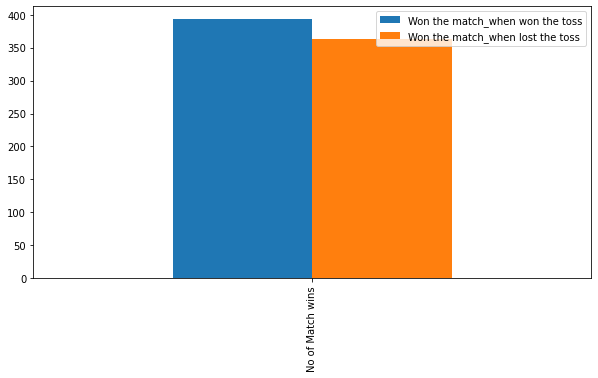

In [13]:
match_win_by_toss = matches.toss_winner == matches.winner
df = pd.DataFrame(match_win_by_toss.value_counts())
df.index = ['Won the match_when won the toss', 'Won the match_when lost the toss']
df.columns = ['No of Match wins']
df = df.T
df.plot(kind = 'bar', figsize = (10,5))
df

### How does toss decision impacts  winning of the match

In [14]:
matches.toss_decision

0      field
1      field
2      field
3      field
4        bat
       ...  
751    field
752      bat
753    field
754    field
755      bat
Name: toss_decision, Length: 756, dtype: object

,Bowl_First_Win,Bat_First_Win
NO_of_Wins,417,339


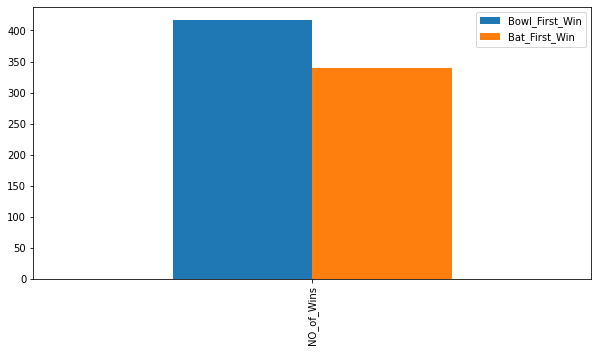

In [15]:
chasing = matches.winner == matches.team2
df = pd.DataFrame(chasing.value_counts())
df.index = ['Bowl_First_Win','Bat_First_Win']
df.columns = ['NO_of_Wins']
df = df.T
df.plot(kind='bar', figsize=(10,5))
df

### Pitch factors that affecting the winning... 

In [16]:
matches.venue.unique()

array(['Rajiv Gandhi International Stadium, Uppal',
       'Maharashtra Cricket Association Stadium',
       'Saurashtra Cricket Association Stadium', 'Holkar Cricket Stadium',
       'M Chinnaswamy Stadium', 'Wankhede Stadium', 'Eden Gardens',
       'Feroz Shah Kotla',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Green Park', 'Punjab Cricket Association Stadium, Mohali',
       'Sawai Mansingh Stadium', 'MA Chidambaram Stadium, Chepauk',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed V

In [17]:
matches.venue.unique().size

41

In [18]:
Bat_first_wins = matches.iloc[np.where(matches.winner != matches.team2)]['venue'].value_counts()
Bat_first_wins = Bat_first_wins.to_dict()
Bat_first_wins

{'Wankhede Stadium': 36,
 'Feroz Shah Kotla': 33,
 'M Chinnaswamy Stadium': 32,
 'MA Chidambaram Stadium, Chepauk': 31,
 'Eden Gardens': 30,
 'Rajiv Gandhi International Stadium, Uppal': 22,
 'Punjab Cricket Association Stadium, Mohali': 15,
 'Sawai Mansingh Stadium': 15,
 'Subrata Roy Sahara Stadium': 11,
 'Kingsmead': 8,
 'Punjab Cricket Association IS Bindra Stadium, Mohali': 7,
 'Maharashtra Cricket Association Stadium': 7,
 'Dr DY Patil Sports Academy': 7,
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium': 6,
 'Sardar Patel Stadium, Motera': 6,
 'Brabourne Stadium': 6,
 'Himachal Pradesh Cricket Association Stadium': 5,
 'Newlands': 5,
 'Rajiv Gandhi Intl. Cricket Stadium': 5,
 'M. Chinnaswamy Stadium': 4,
 'SuperSport Park': 4,
 'Sheikh Zayed Stadium': 4,
 'M. A. Chidambaram Stadium': 4,
 'Barabati Stadium': 4,
 "St George's Park": 3,
 'Saurashtra Cricket Association Stadium': 3,
 'Nehru Stadium': 3,
 'New Wanderers Stadium': 3,
 'Dubai International Cricket Stadium': 3,
 'S

In [19]:
Bowl_first_wins = matches.iloc[np.where(matches.winner == matches.team2)]['venue'].value_counts()
Bowl_first_wins = Bowl_first_wins.to_dict()
Bowl_first_wins

{'Eden Gardens': 47,
 'M Chinnaswamy Stadium': 41,
 'Wankhede Stadium': 37,
 'Rajiv Gandhi International Stadium, Uppal': 34,
 'Feroz Shah Kotla': 34,
 'Sawai Mansingh Stadium': 32,
 'Punjab Cricket Association Stadium, Mohali': 20,
 'MA Chidambaram Stadium, Chepauk': 18,
 'Maharashtra Cricket Association Stadium': 14,
 'Dr DY Patil Sports Academy': 10,
 'Holkar Cricket Stadium': 8,
 'SuperSport Park': 8,
 'Saurashtra Cricket Association Stadium': 7,
 'Punjab Cricket Association IS Bindra Stadium, Mohali': 7,
 'Kingsmead': 7,
 'Sardar Patel Stadium, Motera': 6,
 'Subrata Roy Sahara Stadium': 6,
 'New Wanderers Stadium': 5,
 'IS Bindra Stadium': 5,
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium': 5,
 'Brabourne Stadium': 5,
 'Feroz Shah Kotla Ground': 5,
 'JSCA International Stadium Complex': 5,
 'Green Park': 4,
 'Himachal Pradesh Cricket Association Stadium': 4,
 "St George's Park": 4,
 'M. A. Chidambaram Stadium': 4,
 'Sharjah Cricket Stadium': 4,
 'Shaheed Veer Narayan Singh 

In [20]:
venue_factors1 = pd.DataFrame.from_dict(Bowl_first_wins,orient ='index')
venue_factors2 = pd.DataFrame.from_dict(Bat_first_wins,orient ='index',dtype="Int64")

In [21]:
venue_factors = pd.concat([venue_factors1,venue_factors2], axis = 1)

In [22]:
venue_factors.columns = ['Bowl_first_wins', 'Bat_first_wins']
venue_factors = venue_factors.rename_axis('Venue')

In [23]:
venue_factors.head()

,Bowl_first_wins,Bat_first_wins
Venue,,
Eden Gardens,47,30
M Chinnaswamy Stadium,41,32
Wankhede Stadium,37,36
"Rajiv Gandhi International Stadium, Uppal",34,22
Feroz Shah Kotla,34,33


<AxesSubplot:xlabel='Venue'>

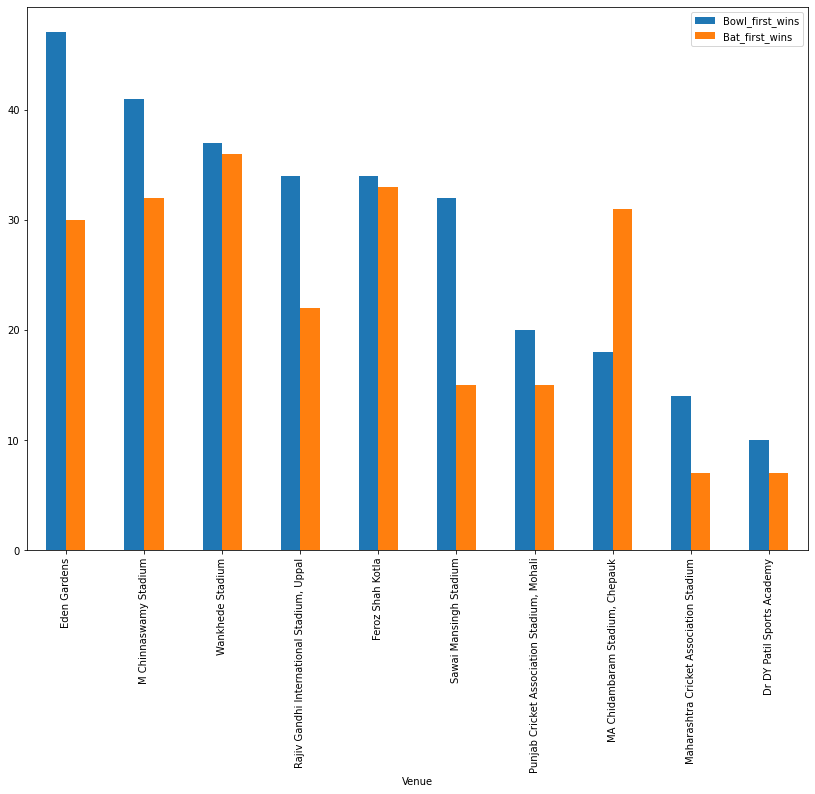

In [24]:
venue_factors = venue_factors[:10]
venue_factors.plot(kind="bar",figsize = (14,10))

In [25]:
venue_factors['Tot_matches'] = venue_factors.Bowl_first_wins+venue_factors.Bat_first_wins
venue_factors.head()

,Bowl_first_wins,Bat_first_wins,Tot_matches
Venue,,,
Eden Gardens,47,30,77
M Chinnaswamy Stadium,41,32,73
Wankhede Stadium,37,36,73
"Rajiv Gandhi International Stadium, Uppal",34,22,56
Feroz Shah Kotla,34,33,67


### Exploring Players Performance

In [26]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [27]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

MS = deliv[deliv.batsman == 'MS Dhoni']


## Batsmen Performance

###  Most Runs Scored

In [28]:
def Most_runs_scored(deliveries):
    df = pd.DataFrame()
    df['Total Runs'] = deliveries.groupby('batsman').sum()['batsman_runs'].sort_values(ascending = False)
    return df
     

,Total Runs
batsman,
V Kohli,5434
SK Raina,5415
RG Sharma,4914
DA Warner,4741
S Dhawan,4632
CH Gayle,4560
MS Dhoni,4477
RV Uthappa,4446
AB de Villiers,4428


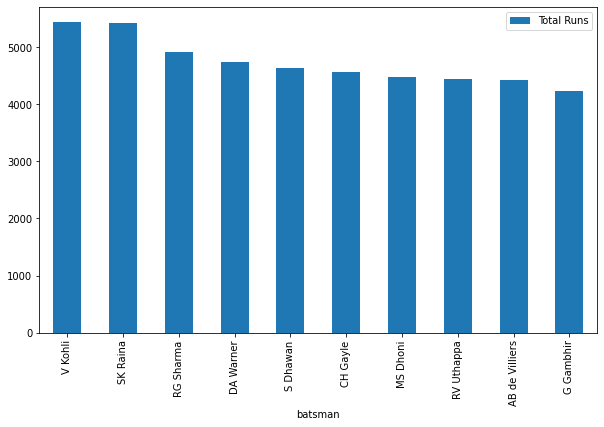

In [29]:
X = Most_runs_scored(deliveries).head(10)
X.plot(kind="bar",figsize = (10,6))
X

### Highest individual score

In [30]:
Indivial_score = pd.DataFrame()
Indivial_score = deliveries.groupby(['match_id','batsman']).sum()['batsman_runs'].sort_values(ascending = False)
Indivial_score.to_frame().head(10)

,,batsman_runs
match_id,batsman,
411,CH Gayle,175
60,BB McCullum,158
562,AB de Villiers,133
7935,RR Pant,130
620,AB de Villiers,129
372,CH Gayle,128
206,M Vijay,127
36,DA Warner,126
516,V Sehwag,122


### Best Batting Average

In [31]:
def Highest_batting_average(deliveries):
    runs = pd.DataFrame()
    dissmissed = pd.DataFrame()
    runs['Total runs of a Player'] = deliveries.groupby('batsman').sum()['batsman_runs']
    dissmissed['Total_dissmissals'] = deliveries['player_dismissed'].value_counts()
    runs = runs.join(dissmissed)
    runs = runs.dropna()
    runs['Batting_avg'] = runs['Total runs of a Player']/runs['Total_dissmissals']
    avg = pd.DataFrame()
    avg['Batting_avg'] = runs['Batting_avg'].sort_values(ascending = False)
    return avg


In [32]:
 Highest_batting_average(deliveries).head(10)


,Batting_avg
batsman,
J Bairstow,58.500000
MN van Wyk,55.666667
AC Voges,45.250000
HM Amla,44.384615
Iqbal Abdulla,44.000000
DA Warner,43.100000
KL Rahul,42.829787
MS Dhoni,42.638095
CH Gayle,41.834862


### Batting Strike Rate

In [33]:
def Highest_strike_rate(deliveries):
    player = pd.DataFrame()
    player['runs_scored'] = deliveries.groupby('batsman').sum()['batsman_runs']
    player['ball_Faced'] = deliveries['batsman'].value_counts()
    player['Strike Rate'] = player.apply(lambda x: 0 if x[1]<150 else (x[0]/x[1])*100 ,axis=1)
    str_rate = pd.DataFrame()
    str_rate['Strike_rate'] = player['Strike Rate'].sort_values(ascending=False)
    return str_rate


In [34]:
Highest_strike_rate(deliveries).head(10)

,Strike_rate
batsman,
AD Russell,179.950187
M Ali,169.945355
SP Narine,166.943867
RR Pant,162.318841
J Bairstow,159.726962
GJ Maxwell,155.543237
CH Morris,153.392330
HH Pandya,151.902174
JC Buttler,150.000000


## Bowlers Performance

### Most Wickets

In [35]:
def Most_wickets(deliveries):
    dismissals = deliveries[pd.isnull(deliveries['player_dismissed'])!=True]
    bowler_dismissals = dismissals[dismissals['dismissal_kind']!='run out']
    wickets = pd.DataFrame(bowler_dismissals.bowler.value_counts())
    return wickets

In [36]:
Most_wickets(deliveries).head(10)

,bowler
SL Malinga,170
A Mishra,156
Harbhajan Singh,150
PP Chawla,149
DJ Bravo,147
B Kumar,133
R Ashwin,125
SP Narine,122
UT Yadav,119
RA Jadeja,108


### Most Dot Balls

In [37]:
def Most_dotballs(deliveries):
    dotballs = deliveries[deliveries['total_runs']==0]
    most_dots = pd.DataFrame(dotballs['bowler'].value_counts())
    return most_dots

In [38]:
Most_dotballs(deliveries).head(10)

,bowler
Harbhajan Singh,1244
SL Malinga,1144
B Kumar,1116
A Mishra,1108
PP Chawla,1100
P Kumar,1075
R Ashwin,1067
SP Narine,1038
DW Steyn,996
UT Yadav,942


### Best Bowling Average

In [39]:
def Best_bowling_average(deliveries):
    runs_conceived = pd.DataFrame(deliveries.groupby('bowler').sum()['total_runs'])
    runs_conceived = runs_conceived[runs_conceived.total_runs>300]
    Wickets_taken = pd.DataFrame()
    Wickets_taken = Most_wickets(deliveries)
    runs_conceived = runs_conceived.join(Wickets_taken)
    runs_conceived.columns = ['Runs_conceived', 'Wickets_taken']
    runs_conceived = runs_conceived.dropna(axis = 0, subset = ['Wickets_taken'])
    runs_conceived['bowling_avg'] = runs_conceived.Runs_conceived/runs_conceived.Wickets_taken
    bowling_avg = pd.DataFrame(runs_conceived['bowling_avg'].sort_values(ascending=True))
    return bowling_avg


In [40]:
Best_bowling_average(deliveries).head(10)

,bowling_avg
bowler,
K Ahmed,17.550000
CRD Fernando,18.000000
BJ Hodge,18.235294
DE Bollinger,18.842105
AD Mascarenhas,19.210526
K Rabada,19.322581
MF Maharoof,19.703704
S Gopal,19.815789
R Rampaul,19.937500


### Recent In Form Players Performance 

There are three catagories that define how good a player is:

Batsman : 

           Runs scored
           
           Batting Average
           
           Batting Strike rate         
          
Bowler :  

          Wickets taken
          
          Dot balls
          
          Bowling Average

In [41]:
def Top_players(Cat1,Cat2,Cat3):
    cat1 = list(Cat1.index)
    cat1 = dict(zip(cat1,range(1,len(Cat1)+1)))
    cat2 = list(Cat2.index)
    cat2 = dict(zip(cat2,range(1,len(Cat2)+1)))
    cat3 = list(Cat3.index)
    cat3 = dict(zip(cat3,range(1,len(Cat3)+1)))
    df1 = pd.DataFrame(cat1,index = ['Rank']).T
    df1 = pd.concat([df1,pd.DataFrame(cat2,index = ['Rank']).T,pd.DataFrame(cat3,index = ['Rank']).T],axis = 0)
    df1['Score'] = 11- df1['Rank']
    df = pd.DataFrame((df1.groupby(df1.index).sum()['Score']/3).sort_values(ascending = False))
    return df.head(3)


In [42]:
latest_matches = pd.DataFrame(matches[matches['season']>=2018]['id'])
latest_matches = latest_matches.reset_index(drop =True)
latest_matches.head()


,id
0,7894
1,7895
2,7896
3,7897
4,7898


In [43]:
latest_deliveries = deliveries[deliveries['match_id']>=7894]
latest_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
150460,7894,1,Mumbai Indians,Chennai Super Kings,1,1,RG Sharma,E Lewis,DL Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
150461,7894,1,Mumbai Indians,Chennai Super Kings,1,2,RG Sharma,E Lewis,DL Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
150462,7894,1,Mumbai Indians,Chennai Super Kings,1,3,RG Sharma,E Lewis,DL Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
150463,7894,1,Mumbai Indians,Chennai Super Kings,1,4,RG Sharma,E Lewis,DL Chahar,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
150464,7894,1,Mumbai Indians,Chennai Super Kings,1,5,RG Sharma,E Lewis,DL Chahar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


### Powerplay Performance

In [44]:
powerplay_delivs = latest_deliveries[latest_deliveries['over']<=6]
Most_runs_scored_pply = Most_runs_scored(powerplay_delivs).head(10)
Most_runs_scored_pply

,Total Runs
batsman,
S Dhawan,619
KL Rahul,612
CA Lynn,570
CH Gayle,500
V Kohli,497
AM Rahane,485
SR Watson,477
Q de Kock,470
JC Buttler,425


In [45]:
Highest_batting_avg_pply = Highest_batting_average(powerplay_delivs).head(10)
Highest_batting_avg_pply

,Batting_avg
batsman,
DA Warner,179.000000
RR Pant,133.000000
JC Buttler,106.250000
SS Iyer,89.666667
MJ Guptill,80.000000
J Bairstow,70.666667
KL Rahul,68.000000
KS Williamson,68.000000
AS Yadav,67.166667


In [46]:
Highest_strike_rate_pply = Highest_strike_rate(powerplay_delivs).head(10)
Highest_strike_rate_pply

,Strike_rate
batsman,
SP Narine,191.855204
JC Buttler,170.000000
PA Patel,152.075472
DA Warner,148.547718
E Lewis,145.365854
CH Gayle,143.678161
AS Yadav,142.402827
KL Rahul,141.339492
V Kohli,140.395480


### Death overs Performance

In [47]:
death_delivs = latest_deliveries[latest_deliveries['over']>=16]
def Most_runs_scored(deliveries):
    df = pd.DataFrame()
    df['Total Runs'] = deliveries.groupby('batsman').sum()['batsman_runs'].sort_values(ascending = False)
    return df

Most_runs_scored_death = Most_runs_scored(death_delivs).head(10)
Most_runs_scored_death

,Total Runs
batsman,
MS Dhoni,593
AD Russell,559
HH Pandya,469
RR Pant,398
KD Karthik,369
Mandeep Singh,290
KL Rahul,252
V Shankar,223
MP Stoinis,222


In [48]:
Highest_batting_average_death = Highest_batting_average(death_delivs).head(10)
Highest_batting_average_death

,Batting_avg
batsman,
MS Dhoni,98.833333
F du Plessis,83.000000
CH Gayle,81.000000
Ankit Sharma,73.000000
S Curran,71.000000
AB de Villiers,69.666667
KL Rahul,63.000000
MP Stoinis,55.500000
SK Raina,50.000000


In [49]:
Highest_strike_rate_death = Highest_strike_rate(death_delivs).head(10)
Highest_strike_rate_death

,Strike_rate
batsman,
RR Pant,241.212121
AD Russell,219.215686
KD Karthik,187.309645
MS Dhoni,183.024691
HH Pandya,171.167883
Mandeep Singh,162.921348
A Dananjaya,0.000000
P Raj,0.000000
P Shaw,0.000000


### Middle Overs Performance

In [50]:
middle_delivs = latest_deliveries[latest_deliveries['over']<16]
middle_delivs = middle_delivs[middle_delivs['over']>6]
def Most_runs_scored(deliveries):
    df = pd.DataFrame()
    df['Total Runs'] = deliveries.groupby('batsman').sum()['batsman_runs'].sort_values(ascending = False)
    return df

Most_runs_scored_middle = Most_runs_scored(middle_delivs).head(10)
Most_runs_scored_middle

,Total Runs
batsman,
RR Pant,697
KS Williamson,584
AB de Villiers,560
SS Iyer,510
AS Yadav,501
SK Raina,489
AT Rayudu,452
KL Rahul,424
SR Watson,415


In [51]:
Highest_batting_average_middle = Highest_batting_average(middle_delivs).head(10)
Highest_batting_average_middle

,Batting_avg
batsman,
HH Pandya,118.000000
R Parag,94.000000
Mandeep Singh,69.500000
DJ Bravo,69.000000
MS Dhoni,62.400000
RR Pant,58.083333
DA Warner,57.800000
J Bairstow,57.250000
N Pooran,57.000000


In [52]:
Highest_strike_rate_middle = Highest_strike_rate(middle_delivs).head(10)
Highest_strike_rate_middle

,Strike_rate
batsman,
SR Watson,184.444444
CH Gayle,157.692308
AD Russell,157.142857
HH Pandya,153.246753
AB de Villiers,152.588556
RR Pant,150.865801
MA Agarwal,148.780488
Ishan Kishan,147.572816
JC Buttler,144.268775


In [53]:
Top_players(Most_runs_scored_pply,Highest_batting_avg_pply,Highest_strike_rate_pply)

,Score
JC Buttler,6.333333
DA Warner,5.666667
KL Rahul,5.333333


In [54]:
Top_players(Most_runs_scored_middle,Highest_batting_average_middle,Highest_strike_rate_middle)

,Score
RR Pant,6.666667
HH Pandya,5.666667
AB de Villiers,4.666667


In [55]:
Top_players(Most_runs_scored_death,Highest_batting_average_death,Highest_strike_rate_death)

,Score
MS Dhoni,9.000000
AD Russell,6.000000
RR Pant,5.666667


### In Form Bowlers

### Best Bowlers in Powerplay

In [56]:
Most_wickets_pply= Most_wickets(powerplay_delivs).head(10)
Most_wickets_pply

,bowler
DL Chahar,25
UT Yadav,18
Harbhajan Singh,11
MJ McClenaghan,11
SP Narine,8
AJ Tye,8
I Sharma,8
AS Rajpoot,7
K Gowtham,7
J Archer,7


In [57]:
Most_dotballs_pply = Most_dotballs(powerplay_delivs).head(10)
Most_dotballs_pply

,bowler
DL Chahar,262
B Kumar,198
UT Yadav,158
DS Kulkarni,110
JJ Bumrah,109
J Archer,108
TA Boult,102
SP Narine,95
I Sharma,94
MJ McClenaghan,93


In [58]:
Best_bowling_average_pply = Best_bowling_average(powerplay_delivs).head(10)
Best_bowling_average_pply

,bowling_avg
bowler,
UT Yadav,23.611111
DL Chahar,25.480000
B Kumar,57.833333
DS Kulkarni,69.200000


### Best Bowler in Middle overs

In [59]:
Most_wickets_middle = Most_wickets(middle_delivs).head(10)
Most_wickets_middle

,bowler
Imran Tahir,30
Rashid Khan,25
S Gopal,21
A Mishra,20
RA Jadeja,19
Kuldeep Yadav,17
YS Chahal,16
R Ashwin,15
M Markande,15
SP Narine,14


In [60]:
Most_dotballs_middle = Most_dotballs(middle_delivs).head(10)
Most_dotballs_middle

,bowler
Rashid Khan,217
Imran Tahir,161
RA Jadeja,150
A Mishra,139
S Gopal,137
YS Chahal,136
Kuldeep Yadav,125
R Ashwin,124
AR Patel,97
RD Chahar,97


In [61]:
Best_bowling_average_middle = Best_bowling_average(middle_delivs).head(10)
Best_bowling_average_middle

,bowling_avg
bowler,
Imran Tahir,16.166667
Rashid Khan,21.360000
A Mishra,22.000000
S Gopal,23.523810
M Markande,25.533333
RA Jadeja,27.421053
SP Narine,27.714286
HH Pandya,29.307692
KH Pandya,31.833333


In [62]:
Most_wickets_death = Most_wickets(death_delivs).head(10)
Most_wickets_death

,bowler
JJ Bumrah,26
K Rabada,19
DJ Bravo,18
Mohammed Shami,16
AJ Tye,15
B Kumar,15
Mohammed Siraj,14
J Archer,14
HH Pandya,14
TA Boult,13


In [63]:
Most_dotballs_death = Most_dotballs(death_delivs).head(10)
Most_dotballs_death

,bowler
JJ Bumrah,104
DJ Bravo,75
Rashid Khan,71
B Kumar,69
J Archer,63
AJ Tye,50
SN Thakur,48
S Kaul,48
P Krishna,48
Mohammed Siraj,48


In [64]:
Best_bowling_average_death = Best_bowling_average(death_delivs).head(10)
Best_bowling_average_death

,bowling_avg
bowler,
JJ Bumrah,17.153846
AJ Tye,21.400000
Mohammed Siraj,23.785714
J Archer,24.214286
S Kaul,26.333333
B Kumar,27.266667
SN Thakur,28.307692
DJ Bravo,28.833333
JD Unadkat,30.846154


In [65]:
Top_players(Most_wickets_pply,Most_dotballs_pply,Best_bowling_average_pply)

,Score
DL Chahar,9.666667
UT Yadav,9.000000
B Kumar,5.666667


In [66]:
Top_players(Most_wickets_middle,Most_dotballs_middle,Best_bowling_average_middle)

,Score
Imran Tahir,9.666667
Rashid Khan,9.333333
A Mishra,7.333333


In [67]:
Top_players(Most_wickets_death,Most_dotballs_death,Best_bowling_average_death)

,Score
JJ Bumrah,10.000000
AJ Tye,6.666667
DJ Bravo,6.666667


### Allrounders


Best Batting Average, Strike Rate, Bowling Average

In [68]:
Allronder1 = Highest_batting_average(latest_deliveries)
Allronder2 = Highest_strike_rate(latest_deliveries)
Allronder3 = Best_bowling_average(latest_deliveries)
Allronder1.join(Allronder2).join(Allronder3).replace(0.0,np.nan).dropna().head()

,Batting_avg,Strike_rate,bowling_avg
batsman,,,
AD Russell,43.550000,192.273731,27.791667
HH Pandya,39.555556,165.581395,26.031250
RA Jadeja,27.375000,125.862069,26.192308
DJ Bravo,26.222222,146.583851,36.720000
SP Narine,22.166667,184.722222,31.629630
